#### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv 에서 2개 Feacure사용
- 구현 프레임워크 : Pytorch

- [1] 모듈로딩 및 데이터 준비

In [1]:
import torch                         # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn                # 
import torch.nn.functional as F
import torch.optim as optimizer
import pandas as pd
from sklearn.model_selection import train_test_split

DATA_FILE=r'C:\KDT-2024\TORCH_DL\DAY_02\data\iris.csv'
irisDF=pd.read_csv(DATA_FILE,usecols=[0,1,2,3])
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[2] 모델 준비
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [2]:
# in_features : sepal.length, sepal.width, petal.length 3개
# out_features : petal.width 1개
model=nn.Linear(3,1)

In [3]:
# 가중치와 절편 확인
for name,param in model.named_parameters():
    print(f'[{name}, {param}]\n')

[weight, Parameter containing:
tensor([[ 0.5318,  0.0384, -0.1697]], requires_grad=True)]

[bias, Parameter containing:
tensor([0.2946], requires_grad=True)]



[3]최적화 인스턴스 준비

In [4]:
### 모델의 가중치와 절편을 절편을 최적화 ==> dlstmxjstmdp wjsekf
adam_optim=optimizer.Adam(model.parameters(),lr=0.1)

[4]학습 ==> 개발자가 구현

- [4-1] 데이터셋 Tensor화 진행 : 데이터 준비시 진행하거나 또는 학습 전 진행

In [5]:
featureTS=torch.from_numpy(irisDF[irisDF.columns[:-1]].values).float()
featureTS.shape

torch.Size([150, 3])

In [6]:
targetTS=torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

In [7]:
# Train & Test
X_train,X_test,y_train,y_test=train_test_split(featureTS,targetTS,test_size=0.2)

# Train & Valid
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2)

print(f'[FEATURE] TRAIN {X_train.shape}, TEST {X_test.shape}, VAL {X_val.shape}')
print(f'[TARGET]  TRAIN {y_train.shape}, TEST {y_test.shape}, VAL {y_val.shape}')

[FEATURE] TRAIN torch.Size([96, 3]), TEST torch.Size([30, 3]), VAL torch.Size([24, 3])
[TARGET]  TRAIN torch.Size([96, 1]), TEST torch.Size([30, 1]), VAL torch.Size([24, 1])


- [4-2] 학습진행
    * 학습횟수 결정 ==> 에포크 설정
    * 학습결과 저장 ==> 손실저장 변수

In [8]:
## 테스트/검증 함수 
# ==> 가중치, 절편 엡데이트 X, 최적화 미진행
# ==> 현제 가중치와 절편값으로 테스트 진행
def testing(testTS,targetTS,kind='Val'):
    with torch.no_grad():      # 가중치 및 절편 업데이트 진행 X
        #(1)학습진행 - forward
        pre_y=model(testTS)
        #(2)오차계산 - 손실함수
        loss=F.mse_loss(pre_y,targetTS)
        #(4)학습결과 출력 및 저장
        print(f'[{kind}] LOSS : {loss}')

    return loss

In [9]:
EPOCH=10

# 모델 학습 함수
def training(featureTS,targetTS,valTS,valTargetTS):
    loss_history=[[],[]]
    for epoch in range(EPOCH):
        #(1)학습진행 - forward
        pre_y=model(featureTS)
        #(2)오차계산 - 손실함수
        loss=F.mse_loss(pre_y,targetTS)
        loss_history[0].append(loss.item())
        #(3)최적화 - 가중치,절편 업데이트 backward
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()
        #(4)검증 - 모델이
        val_loss=testing(valTS,valTargetTS)
        loss_history[1].append(val_loss.item())
        #(4)학습결과 출력 및 저장
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history
# 모델 학습 진행
loss=training(X_train,y_train,X_val,y_val)


[Val] LOSS : 0.8820303082466125
[0/10] LOSS : 3.6792945861816406
[Val] LOSS : 1.9175969362258911
[1/10] LOSS : 1.1042914390563965
[Val] LOSS : 2.6663060188293457
[2/10] LOSS : 1.6224403381347656
[Val] LOSS : 2.1240546703338623
[3/10] LOSS : 2.1826202869415283
[Val] LOSS : 1.1901153326034546
[4/10] LOSS : 1.7453938722610474
[Val] LOSS : 0.6205269694328308
[5/10] LOSS : 1.0262218713760376
[Val] LOSS : 0.5971384644508362
[6/10] LOSS : 0.6565393805503845
[Val] LOSS : 0.7969710826873779
[7/10] LOSS : 0.7550076842308044
[Val] LOSS : 0.8364002704620361
[8/10] LOSS : 0.9914081692695618
[Val] LOSS : 0.6423115134239197
[9/10] LOSS : 1.010666012763977


In [10]:
loss

[[3.6792945861816406,
  1.1042914390563965,
  1.6224403381347656,
  2.1826202869415283,
  1.7453938722610474,
  1.0262218713760376,
  0.6565393805503845,
  0.7550076842308044,
  0.9914081692695618,
  1.010666012763977],
 [0.8820303082466125,
  1.9175969362258911,
  2.6663060188293457,
  2.1240546703338623,
  1.1901153326034546,
  0.6205269694328308,
  0.5971384644508362,
  0.7969710826873779,
  0.8364002704620361,
  0.6423115134239197]]

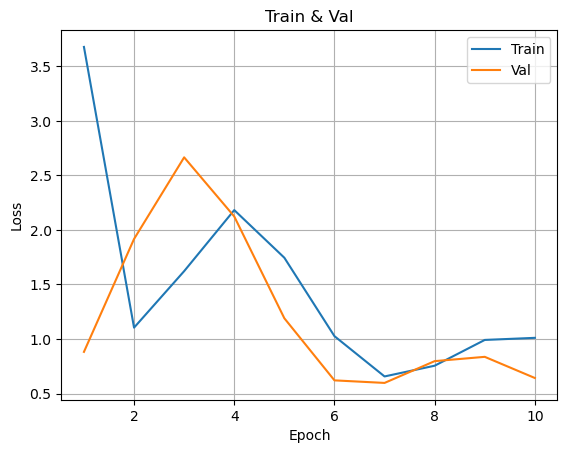

In [11]:
# 학습 후 로스 시각화
import matplotlib.pyplot as plt
plt.plot(range(1,11),loss[0],label='Train')
plt.plot(range(1,11),loss[1],label='Val')
plt.title('Train & Val')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()